### Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, euclidean
from scipy.stats import zscore
import warnings
from itertools import combinations

warnings.filterwarnings("ignore")

### Завантаження та первинна обробка даних

In [2]:
file_path = "data5.xlsx"
df = pd.read_excel(file_path, sheet_name=0, skiprows=2)

df.columns = ['Продукт', 'Продажі', 'Відсоток_до_підсумку',
              'На_одну_особу_грн', 'Мережа_тис_грн',
              'Відсоток_до_групи_мережі', 'Додатковий_відсоток']

df = df.dropna()
df['Продажі'] = pd.to_numeric(df['Продажі'].astype(str).str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['Продажі'])

df["Індекс"] = np.arange(1, len(df) + 1)
X = df[["Індекс", "Продажі"]].values

In [5]:
df.head(20)

,Продукт,Продажі,Відсоток_до_підсумку,На_одну_особу_грн,Мережа_тис_грн,Відсоток_до_групи_мережі,Додатковий_відсоток,Індекс
0,М'ясо та птиця свіжі та заморожені,2559470.7,"2,4","59,6","2439547,0","95,3","79,9",1
1,"М'ясо копчене, солоне та ковбасні вироби",2282388.0,"2,1","53,2","2192554,1","96,1","84,2",2
2,"Консерви, готові продукти м'ясні",280761.0,"0,3","6,5","267239,2","95,2","78,2",3
3,у тому числі напівфабрикати м'ясні,126643.1,"0,1","3,0","121545,3","96,0",-,4
4,Риба і морепродукти харчові,1204636.8,"1,1","28,1","734695,8","61,0","62,0",5
5,"Консерви, готові продукти рибні",551847.6,"0,5","12,9","398503,7","72,2","68,1",6
6,у тому числі напівфабрикати рибні,113203.6,"0,1","2,6","92542,8","81,7",-,7
7,Молоко та продукти молочні,2326818.6,"2,2","54,2","2196390,7","94,4","93,7",8
8,"Сир сичужний, плавлений та кисломолочний",1460041.9,"1,4","34,0","1278439,4","87,6","88,9",9
9,Масло вершкове,564347.9,"0,5","13,1","550823,3","97,6","89,0",10


### Візуалізація даних

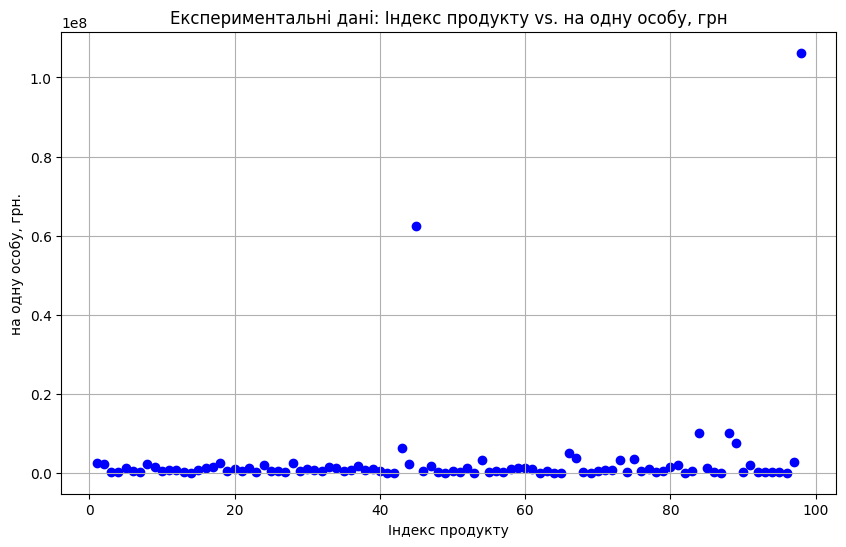

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Індекс"], df["Продажі"], color='blue')
plt.title("Експериментальні дані: Індекс продукту vs. на одну особу, грн")
plt.xlabel("Індекс продукту")
plt.ylabel("на одну особу, грн.")
plt.grid(True)

### Налаштування метрик та методів кластеризації

In [31]:
metrics = {
    "Евклідова": "euclidean",
    "Стандартизована Евклідова": "standardized_euclidean",
    "Махаланобіса": "mahalanobis"
}

linkage_methods = {
    "Ближчого сусіда": "single",
    "Середнього зв'язку": "average",
    "Центроїдний": "centroid"
}

cov_matrix = np.cov(X.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
X_std = zscore(X)
num_clusters = 3
all_results = []

### Перебір усіх комбінацій метрик та методів кластеризації

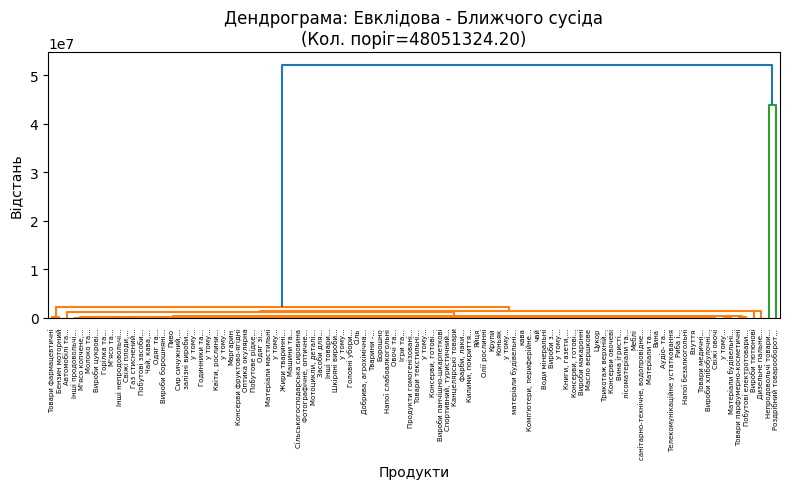

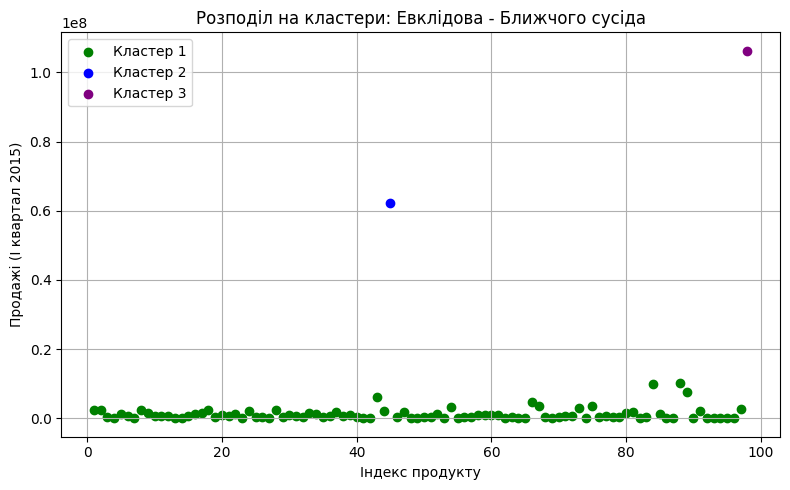

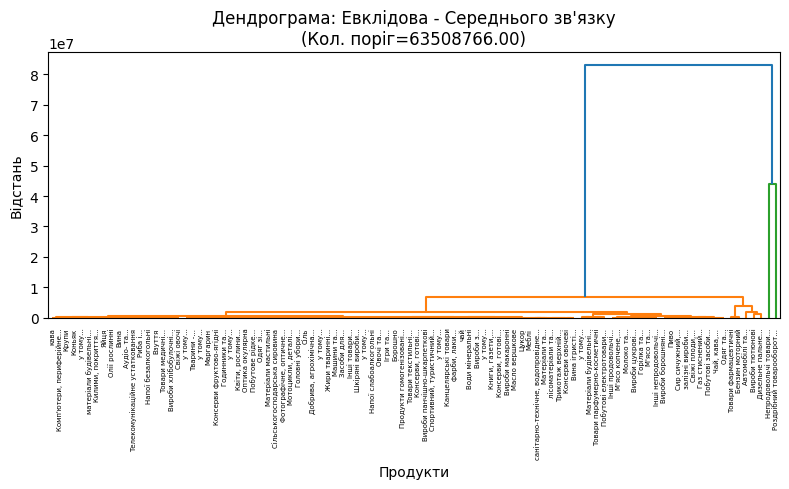

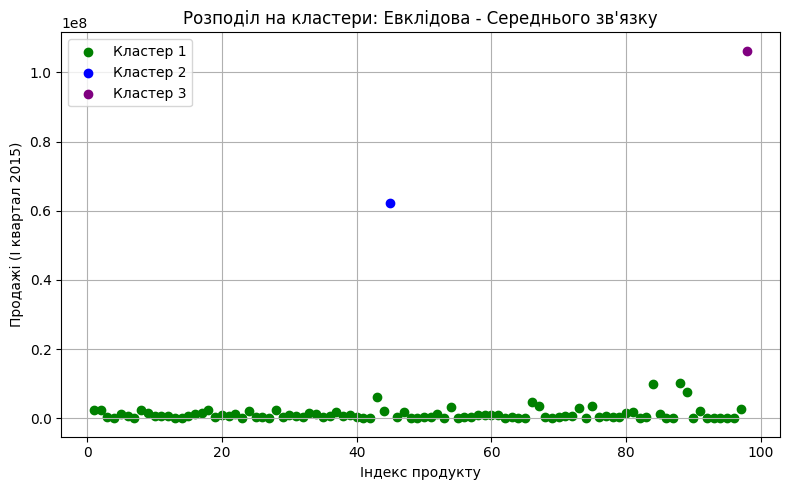

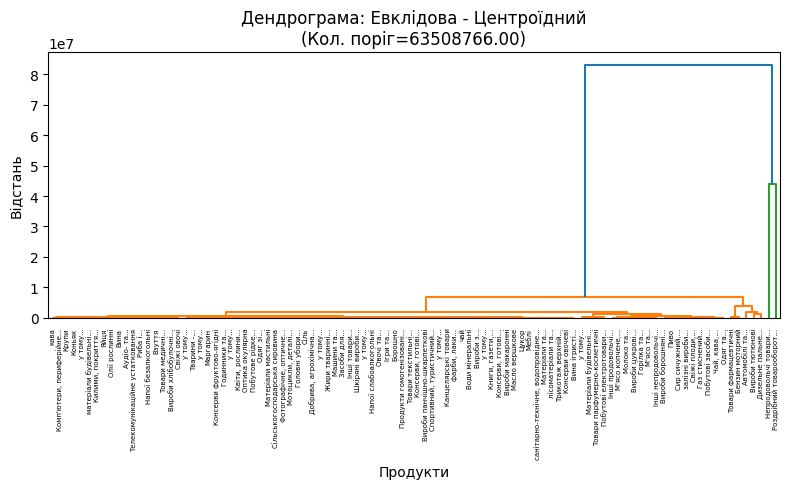

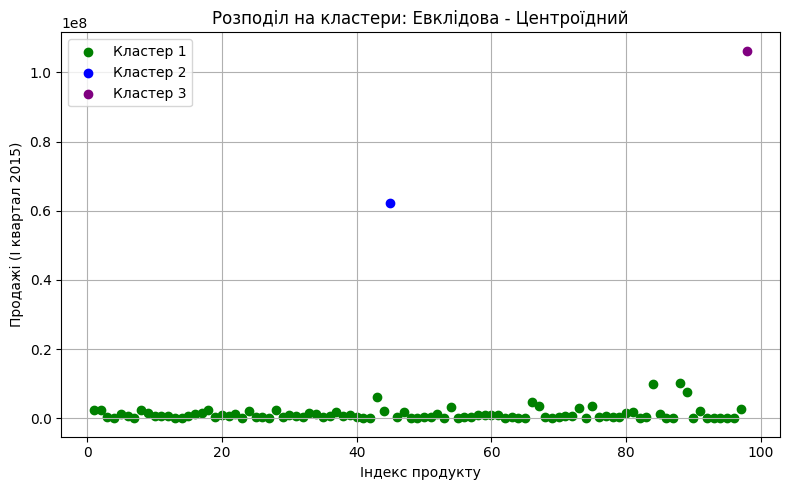

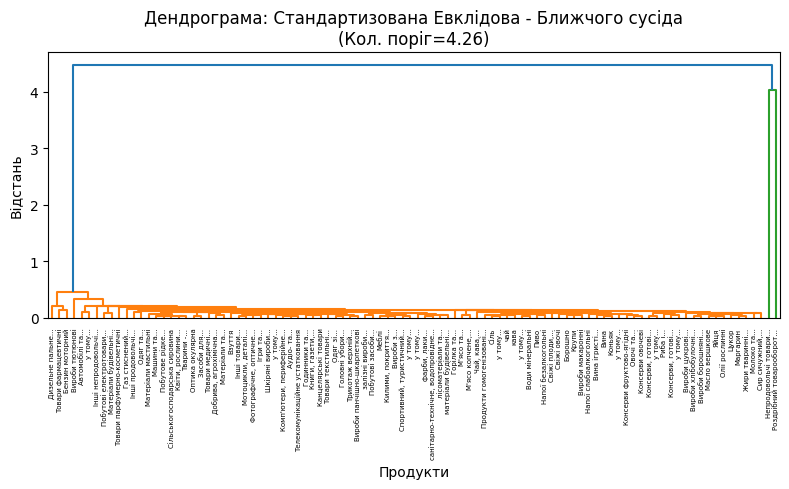

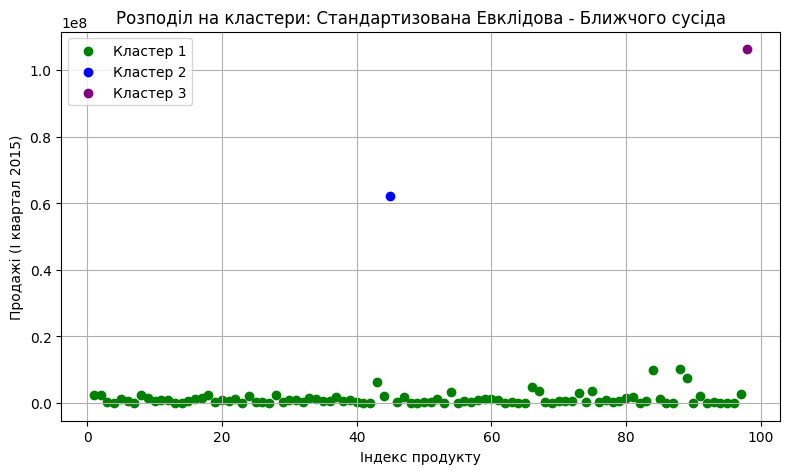

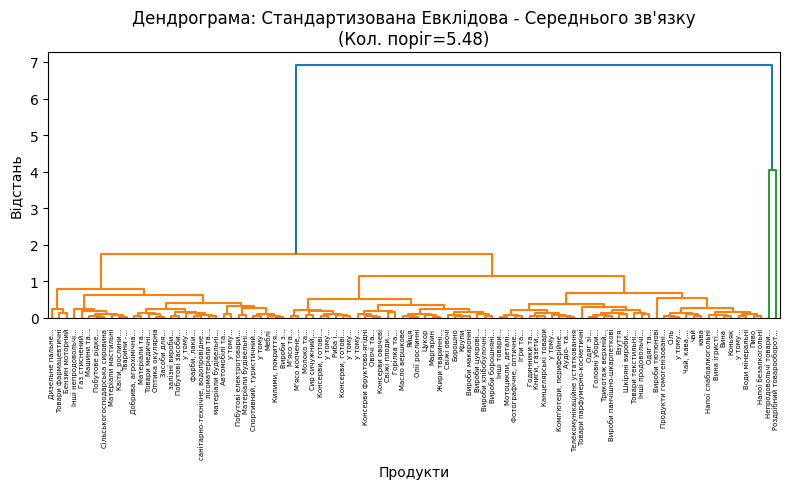

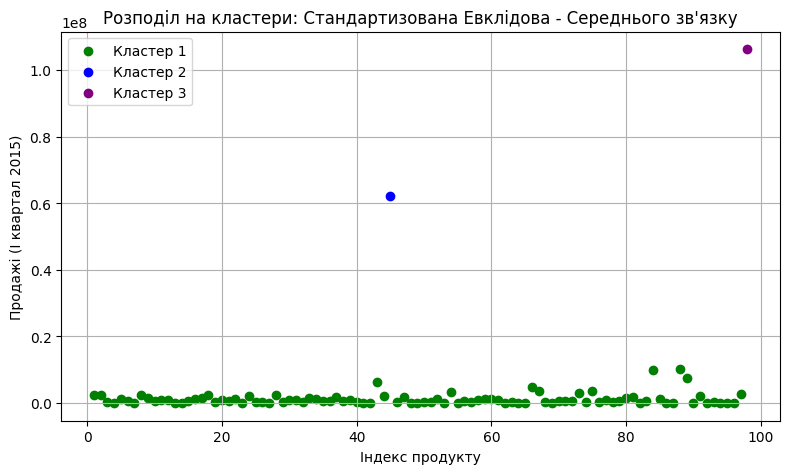

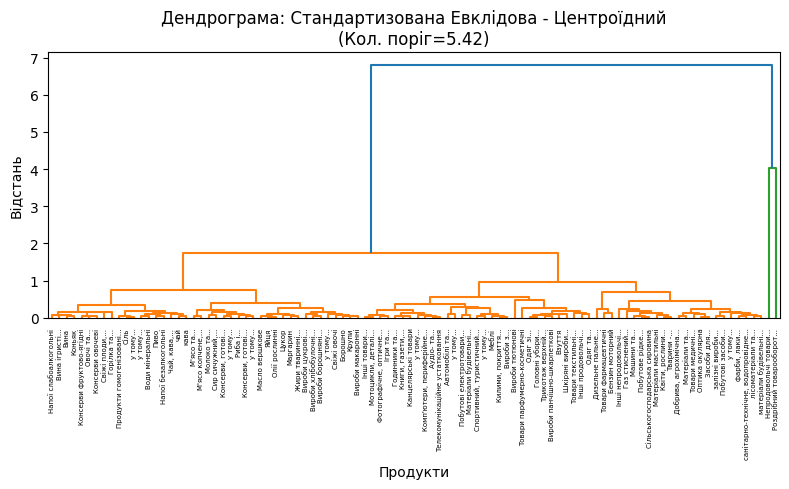

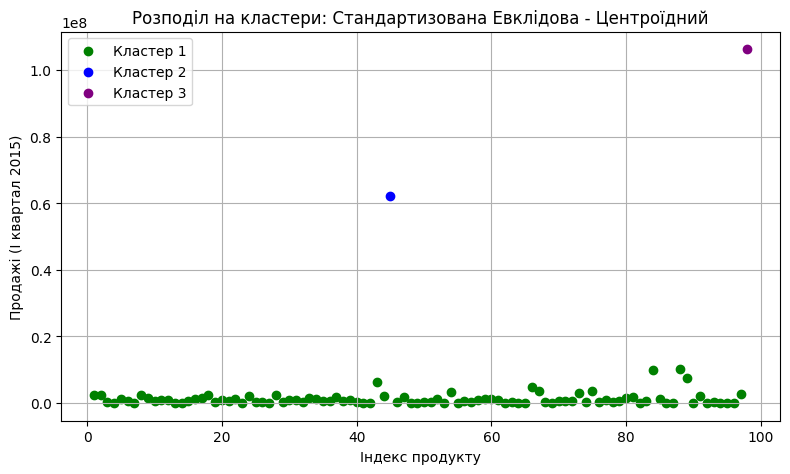

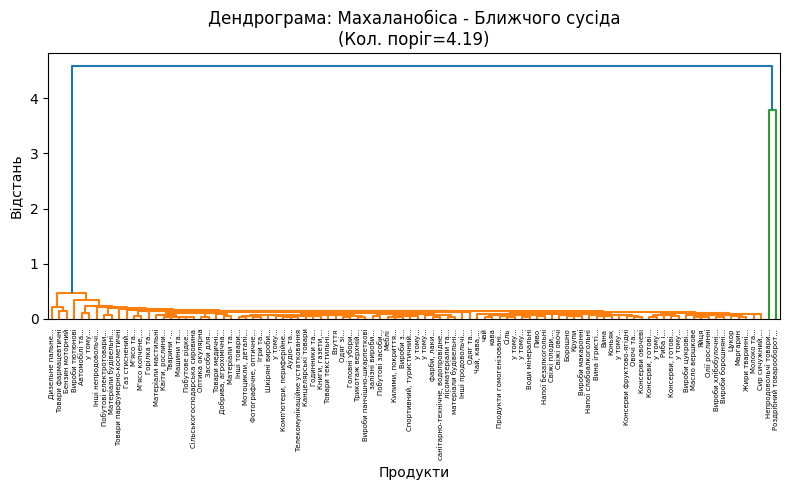

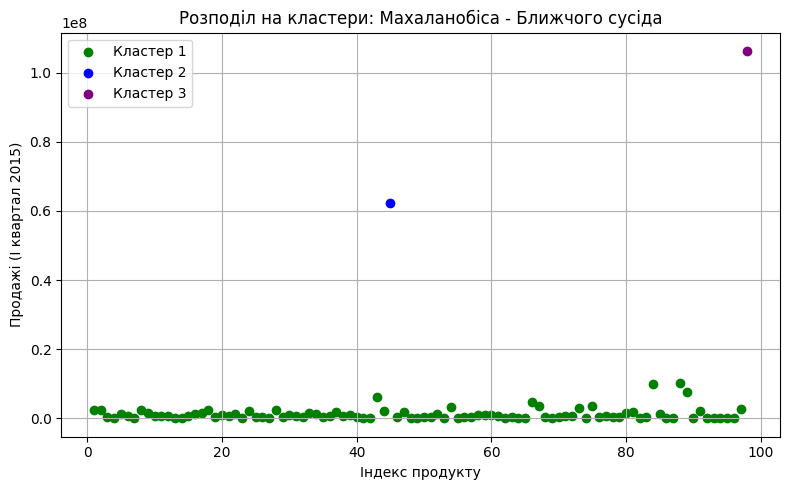

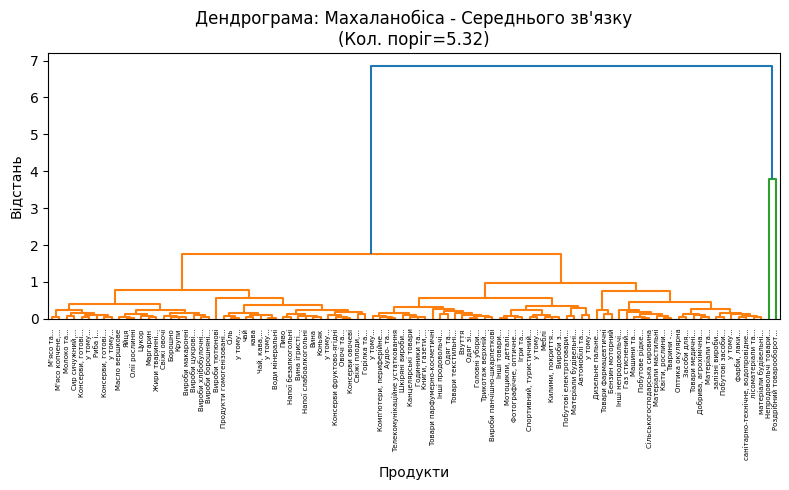

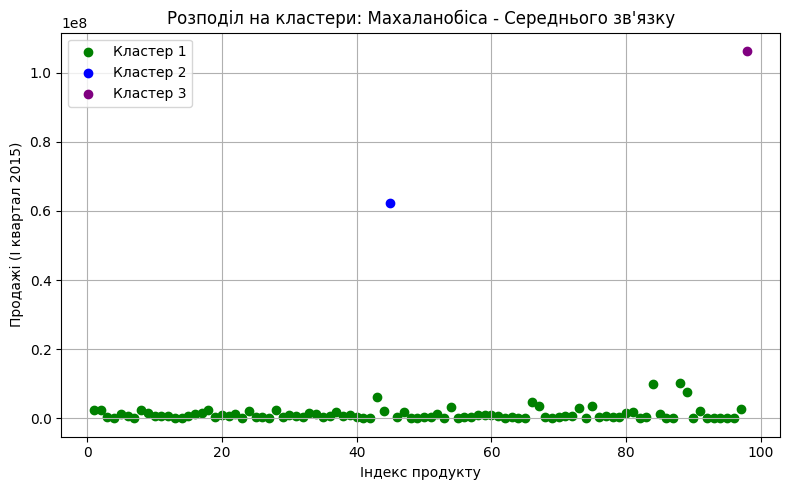

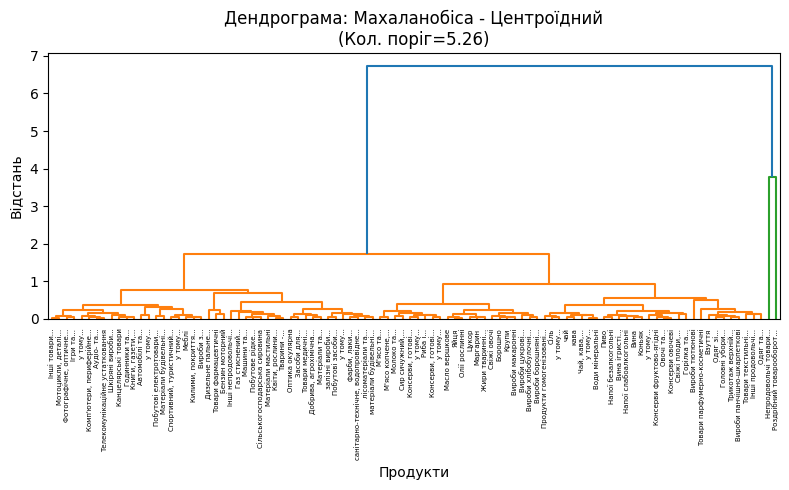

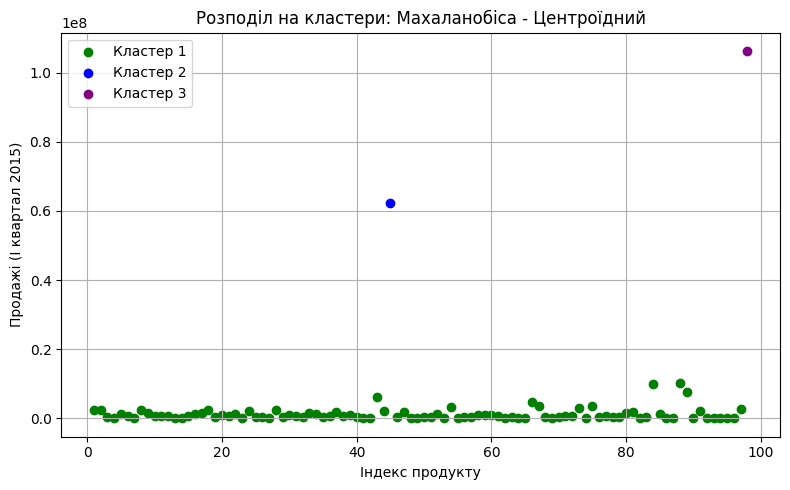

In [32]:
for met_name, met in metrics.items():
    if met == "mahalanobis":
        d = pdist(X, metric="mahalanobis", VI=inv_cov_matrix)
        X_use = X
    elif met == "standardized_euclidean":
        d = pdist(X_std, metric="euclidean")
        X_use = X_std
    else:
        d = pdist(X, metric=met)
        X_use = X

    for link_name, link_method in linkage_methods.items():
        Z = linkage(d, method=link_method)
        coph_corr, _ = cophenet(Z, d)

        all_results.append({
            "Метрика": met_name,
            "Метод зв'язування": link_name,
            "Кофенетичний": coph_corr,
            "Z": Z,
            "d": d,
            "X": X_use
        })

        cutoff = np.median([Z[-2, 2], Z[-1, 2]])

        # Дендрограма
        labels_short = [' '.join(name.split()[:2]) + '...' if len(name.split()) > 2 else name for name in df["Продукт"]]

        plt.figure(figsize=(8, 5))
        dendrogram(Z, labels=labels_short, leaf_rotation=90, color_threshold=cutoff)
        plt.title(f"Дендрограма: {met_name} - {link_name}\n(Кол. поріг={cutoff:.2f})")
        plt.xlabel("Продукти")
        plt.ylabel("Відстань")
        plt.tight_layout()
        plt.show()

        # Графік кластерів
        clusters = fcluster(Z, num_clusters, criterion='maxclust')
        df["Кластер"] = clusters

        plt.figure(figsize=(8, 5))
        colors = ['red', 'green', 'blue', 'purple', 'orange']
        for cluster_id in sorted(np.unique(clusters)):
            subset = df[df["Кластер"] == cluster_id]
            plt.scatter(
                subset["Індекс"],
                subset["Продажі"],
                color=colors[cluster_id % len(colors)],
                label=f"Кластер {cluster_id}"
            )

        plt.title(f"Розподіл на кластери: {met_name} - {link_name}")
        plt.xlabel("Індекс продукту")
        plt.ylabel("Продажі (І квартал 2015)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

### Порівняння кластеризацій

In [33]:
df_results = pd.DataFrame(all_results)
print("\n=== ТАБЛИЦЯ КОФЕНЕТИЧНИХ КОЕФІЦІЄНТІВ ===")
print(df_results[["Метрика", "Метод зв'язування", "Кофенетичний"]])

best_row = df_results.loc[df_results["Кофенетичний"].idxmax()]
worst_row = df_results.loc[df_results["Кофенетичний"].idxmin()]

print("\nНайкращий спосіб кластеризації:")
print(best_row[["Метрика", "Метод зв'язування", "Кофенетичний"]])

print("\nНайгірший спосіб кластеризації:")
print(worst_row[["Метрика", "Метод зв'язування", "Кофенетичний"]])


=== ТАБЛИЦЯ КОФЕНЕТИЧНИХ КОЕФІЦІЄНТІВ ===
                     Метрика   Метод зв'язування  Кофенетичний
0                  Евклідова     Ближчого сусіда      0.961143
1                  Евклідова  Середнього зв'язку      0.963302
2                  Евклідова         Центроїдний      0.963302
3  Стандартизована Евклідова     Ближчого сусіда      0.805375
4  Стандартизована Евклідова  Середнього зв'язку      0.887326
5  Стандартизована Евклідова         Центроїдний      0.893033
6               Махаланобіса     Ближчого сусіда      0.802421
7               Махаланобіса  Середнього зв'язку      0.896234
8               Махаланобіса         Центроїдний      0.894614

Найкращий спосіб кластеризації:
Метрика                       Евклідова
Метод зв'язування    Середнього зв'язку
Кофенетичний                   0.963302
Name: 1, dtype: object

Найгірший спосіб кластеризації:
Метрика                 Махаланобіса
Метод зв'язування    Ближчого сусіда
Кофенетичний                0.802421
Name: 6

### Детальний аналіз найкращого методу

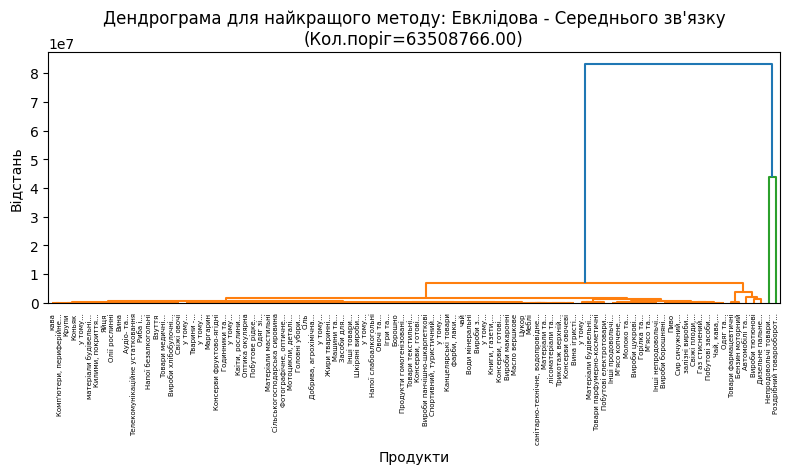

In [15]:
Z_best = best_row["Z"]
d_best = best_row["d"]
X_best = best_row["X"]
met_best = best_row["Метрика"]
link_best = best_row["Метод зв'язування"]

cutoff_best = np.median([Z_best[-2, 2], Z_best[-1, 2]])

labels_short = [' '.join(name.split()[:2]) + '...' if len(name.split()) > 2 else name for name in df["Продукт"]]

plt.figure(figsize=(8, 5))
dendrogram(Z_best, labels=labels_short, leaf_rotation=90, color_threshold=cutoff_best)
plt.title(f"Дендрограма для найкращого методу: {met_best} - {link_best}\n(Кол.поріг={cutoff_best:.2f})")
plt.xlabel("Продукти")
plt.ylabel("Відстань")
plt.tight_layout()

### Центри кластерів і розрахунок відстаней

In [16]:
best_clusters = fcluster(Z_best, num_clusters, criterion='maxclust')
df["Кластер"] = best_clusters

cluster_centers = df.groupby("Кластер")[["Індекс", "Продажі"]].mean()
cluster_disp = df.groupby("Кластер")[["Індекс", "Продажі"]].std()

print("\nЦентри кластерів (середні значення):")
print(cluster_centers)

print("\nВнутрішньокластерна дисперсія (std):")
print(cluster_disp)


Центри кластерів (середні значення):
            Індекс       Продажі
Кластер                         
1        49.041667  1.219525e+06
2        45.000000  6.232518e+07
3        98.000000  1.062664e+08

Внутрішньокластерна дисперсія (std):
            Індекс       Продажі
Кластер                         
1        28.290194  1.836239e+06
2              NaN           NaN
3              NaN           NaN


### Обчислення відстаней до центрів

In [18]:
def dist_to_center(row):
    c = cluster_centers.loc[row["Кластер"]]
    return euclidean((row["Індекс"], row["Продажі"]), (c["Індекс"], c["Продажі"]))

df["Відстань_до_центру"] = df.apply(dist_to_center, axis=1)

print("\nВідстані кожного елемента до центру свого кластера:")
print(df[["Продукт", "Кластер", "Відстань_до_центру"]])


Відстані кожного елемента до центру свого кластера:
                                              Продукт  Кластер  \
0                  М'ясо та птиця свіжі та заморожені        1   
1            М'ясо копчене, солоне та ковбасні вироби        1   
2                    Консерви, готові продукти м'ясні        1   
3                  у тому числі напівфабрикати м'ясні        1   
4                         Риба і морепродукти харчові        1   
..                                                ...      ...   
95  Побутове рідке котельне паливо, газ у балонах,...        1   
96                      Сільськогосподарська сировина        1   
97                        Машини та устатковання інші        1   
98   Інші непродовольчі споживчі та неспоживчі товари        1   
99   Роздрібний товарооборот торгової мережі - усього        3   

    Відстань_до_центру  
0         1.339946e+06  
1         1.062863e+06  
2         9.387642e+05  
3         1.092882e+06  
4         1.488846e+04  
..  

### Відстані між центрами кластерів

In [19]:
dist_dict = {}
for (i, j) in combinations(cluster_centers.index, 2):
    ci = cluster_centers.loc[i]
    cj = cluster_centers.loc[j]
    d_cij = euclidean((ci["Індекс"], ci["Продажі"]), (cj["Індекс"], cj["Продажі"]))
    dist_dict[f"({i},{j})"] = d_cij

print("\nВідстані між центрами кластерів:")
for k, v in dist_dict.items():
    print(f"{k}: {v:.2f}")


Відстані між центрами кластерів:
(1,2): 61105656.70
(1,3): 105046906.90
(2,3): 43941250.20


### Підсумковий графік кластеризації

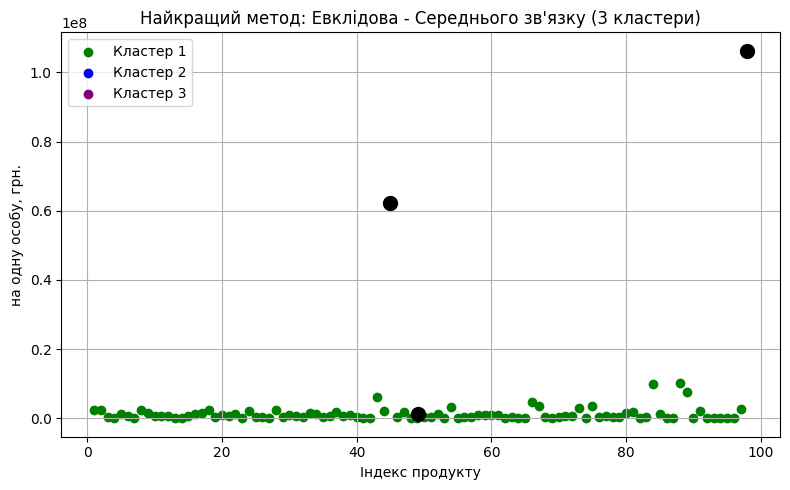

In [22]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for cl in sorted(np.unique(best_clusters)):
    subset = df[df["Кластер"] == cl]
    plt.scatter(
        subset["Індекс"],
        subset["Продажі"],
        color=colors[cl % len(colors)],
        label=f"Кластер {cl}"
    )

for cl in cluster_centers.index:
    cx, cy = cluster_centers.loc[cl]["Індекс"], cluster_centers.loc[cl]["Продажі"]
    plt.plot(cx, cy, 'ko', markersize=10, markeredgecolor='k')

plt.title(f"Найкращий метод: {met_best} - {link_best} (3 кластери)")
plt.xlabel("Індекс продукту")
plt.ylabel("на одну особу, грн.")
plt.legend()
plt.grid(True)
plt.tight_layout()